![image info](https://ineuron.ai/images/ineuron-logo.png)

### Missing values approaches

* Check for Missing data
* Drop NA Values
* MEAN/MEDAIN Imputation
* Random sample imputation

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv('data/google_cleaned.csv')

**Show Top 5 Records**

In [5]:
#sample of the data(random_sample)
df.sample(10)

App            Category  \
8425                                         DH Mariage           LIFESTYLE   
2743                     Gyft - Mobile Gift Card Wallet            SHOPPING   
1284                     BetterMe: Weight Loss Workouts  HEALTH_AND_FITNESS   
1546                                     OpenCV Manager  LIBRARIES_AND_DEMO   
4560                                  Wonder5 Masters R              FAMILY   
932                          Tubi TV - Free Movies & TV       ENTERTAINMENT   
7025  Pixel art pro-Sand box,paint by number,number ...              FAMILY   
2306                                           CareZone             MEDICAL   
9961                                   Light Meter - EV         PHOTOGRAPHY   
8899                     DU Launcher - Boost Your Phone     PERSONALIZATION   

      Rating  Reviews  Size  Installs  Type  Price Content Rating  \
8425     NaN        0   4.9        50  Free    0.0       Everyone   
2743     4.1     9701  14.0    500000  Free    0.0       Everyone   
1284     4.2    14709  15.0   5000000  Free    0.0       Everyone   
1546     3.7    12657   NaN   1000000  Free    0.0       Everyone   
4560     4.1     1655  83.0    100000  Free    0.0       Everyone   
932      4.3   296829  11.0  10000000  Free    0.0           Teen   
7025     4.5     2442  13.0    100000  Free    0.0       Everyone   
2306     4.4    27524   NaN   1000000  Free    0.0       Everyone   
9961     4.0       26   8.5      1000  Free    0.0       Everyone   
8899     4.5    67707   4.8   1000000  Free    0.0       Everyone   

                  Genres Last Updated         Current Ver         Android Ver  \
8425           Lifestyle   2017-09-12                 1.0          4.3 and up   
2743            Shopping   2018-07-25               2.4.0          4.4 and up   
1284    Health & Fitness   2018-07-26               2.8.2          5.0 and up   
1546    Libraries & Demo   2015-09-21                3.00  Varies with device   
4560        Role Playing   2018-08-02              1.1.52          4.3 and up   
932        Entertainment   2018-07-15              2.13.5          4.1 and up   
7025  Casual;Brain Games   2018-07-06             2.5.111        4.0.3 and up   
2306             Medical   2018-07-30  Varies with device  Varies with device   
9961         Photography   2018-08-02               4.1.1          4.4 and up   
8899     Personalization   2016-02-07             1.8.0.4          4.0 and up   

      Day  Month  Year  
8425   12      9  2017  
2743   25      7  2018  
1284   26      7  2018  
1546   21      9  2015  
4560    2      8  2018  
932    15      7  2018  
7025    6      7  2018  
2306   30      7  2018  
9961    2      8  2018  
8899    7      2  2016

### 1. Check for Missing data

In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False) 

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [9]:
df.shape[0] 

10840

In [11]:
(1695/10840)*100

15.636531365313653

In [ ]:
* (100)

In [12]:
null_df = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null_df

Null Values  Percentage Null Values
Size                   1695               15.636531
Rating                 1474               13.597786
Current Ver               8                0.073801
Android Ver               2                0.018450
Type                      1                0.009225
App                       0                0.000000
Category                  0                0.000000
Reviews                   0                0.000000
Installs                  0                0.000000
Price                     0                0.000000
Content Rating            0                0.000000
Genres                    0                0.000000
Last Updated              0                0.000000
Day                       0                0.000000
Month                     0                0.000000
Year                      0                0.000000

In [ ]:
#plotting the num value counts

In [13]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)

In [14]:
null_counts

Size              0.156365
Rating            0.135978
Current Ver       0.000738
Android Ver       0.000185
Type              0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Day               0.000000
Month             0.000000
Year              0.000000
dtype: float64

In [15]:
len(null_counts)

16

In [18]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
np.arange(len(null_counts))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

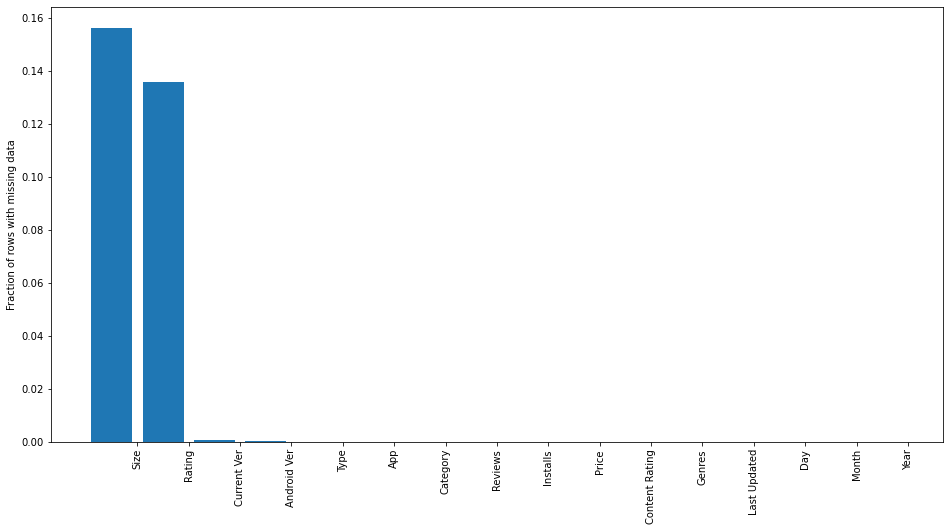

In [5]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

### 2. Drop NA Values

In [ ]:
#this is best practice to create a copy of the data

In [19]:
df_copy = df.copy()

In [29]:
cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [20]:
df_copy["Size"].isnull().sum()

1695

In [22]:
df_copy["Size"].isnull().mean()*100

15.636531365313653

In [24]:
df_copy["Price"].isnull().mean()*100

0.0

In [25]:
if df_copy["Size"].isnull().sum():
    print("yes")
else:
    print("no")

yes


In [26]:
if df_copy["Price"].isnull().mean()*100:
    print("yes")
else:
    print("no")

no


In [28]:
False+True

1

## dropping missing values

In [31]:
df.shape

(10840, 16)

In [32]:
drop_df.shape

(7723, 5)

In [33]:
10840-7723

3117

In [30]:
drop_df = df_copy[cols].dropna()
drop_df

Rating    Size  Type         Current Ver         Android Ver
0         4.1  19.000  Free               1.0.0        4.0.3 and up
1         3.9  14.000  Free               2.0.0        4.0.3 and up
2         4.7   8.700  Free               1.2.4        4.0.3 and up
3         4.5  25.000  Free  Varies with device          4.2 and up
4         4.3   2.800  Free                 1.1          4.4 and up
...       ...     ...   ...                 ...                 ...
10832     4.8   0.619  Free                 0.8          2.2 and up
10833     4.0   2.600  Free               1.0.0          4.1 and up
10835     4.5  53.000  Free                1.48          4.1 and up
10836     5.0   3.600  Free                 1.0          4.1 and up
10839     4.5  19.000  Free  Varies with device  Varies with device

[7723 rows x 5 columns]

In [9]:
df_copy.shape, drop_df.shape

((10840, 16), (7723, 5))

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

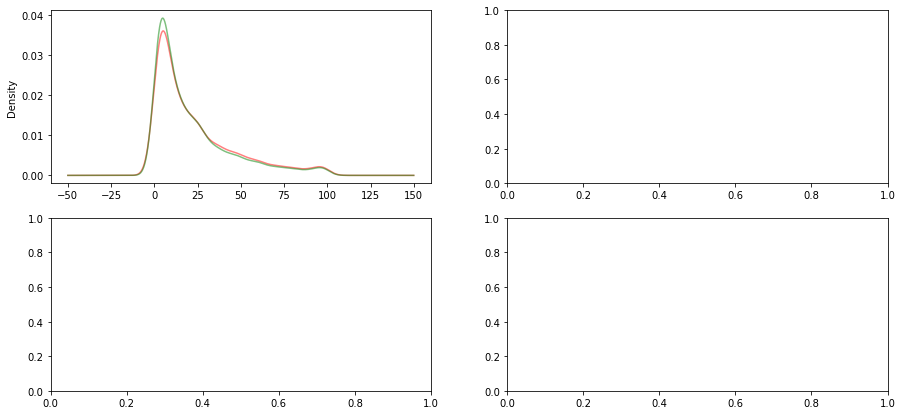

In [40]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')

<Figure size 432x288 with 0 Axes>

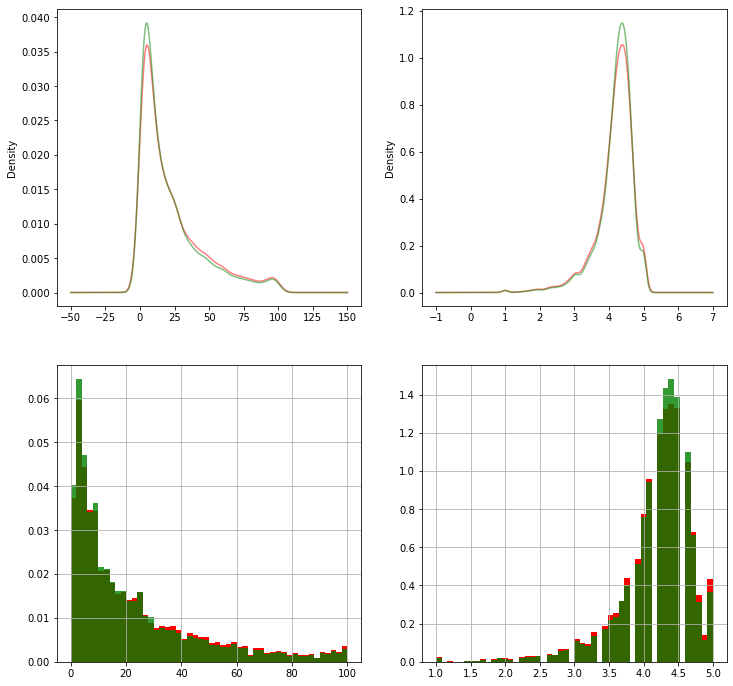

In [41]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
drop_df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
drop_df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
drop_df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

#### Insights
-As we can observe from above plots
- Drop NA Technique is changing our distribution pattern
- So we reject Drop NA Technique

### 3. MEAN/MEDAIN Imputation

In [42]:
df_copy_me_mo = df.copy()

In [54]:
df_copy_me_mo[df_copy_me_mo.isnull()]

App Category  Rating  Reviews  Size  Installs Type  Price  \
0      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
1      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
2      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
3      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
4      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
...    ...      ...     ...      ...   ...       ...  ...    ...   
10835  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10836  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10837  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10838  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10839  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   

      Content Rating Genres Last Updated Current Ver Android Ver  Day  Month  \
0                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
1                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
2                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
3                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
4                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
...              ...    ...          ...         ...         ...  ...    ...   
10835            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10836            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10837            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10838            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10839            NaN    NaN          NaN         NaN         NaN  NaN    NaN   

       Year  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
10835   NaN  
10836   NaN  
10837   NaN  
10838   NaN  
10839   NaN  

[10840 rows x 16 columns]

In [58]:
df_copy_me_mo[df_copy_me_mo['Size'].isnull()]


App             Category  \
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
68                                                REPUVE    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10712  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER   
10724                                          Posta App  MAPS_AND_NAVIGATION   
10764                    Chat For Strangers - Video Chat               SOCIAL   
10825          Frim: get new friends on local chat rooms               SOCIAL   
10838                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
37        4.1    36639   NaN   5000000  Free    0.0       Everyone   
42        4.4   295221   NaN  10000000  Free    0.0       Everyone   
52        4.6    17057   NaN   1000000  Free    0.0       Everyone   
67        4.3    40211   NaN   5000000  Free    0.0       Everyone   
68        3.9      356   NaN    100000  Free    0.0       Everyone   
...       ...      ...   ...       ...   ...    ...            ...   
10712     4.4     3471   NaN    100000  Free    0.0       Everyone   
10724     3.6        8   NaN      1000  Free    0.0       Everyone   
10764     3.4      622   NaN    100000  Free    0.0     Mature 17+   
10825     4.0    88486   NaN   5000000  Free    0.0     Mature 17+   
10838     4.5      114   NaN      1000  Free    0.0     Mature 17+   

                  Genres Last Updated         Current Ver         Android Ver  \
37          Art & Design   2018-07-14  Varies with device        2.3.3 and up   
42          Art & Design   2018-07-30  Varies with device  Varies with device   
52       Auto & Vehicles   2018-07-30  Varies with device  Varies with device   
67       Auto & Vehicles   2018-07-30  Varies with device  Varies with device   
68       Auto & Vehicles   2018-05-25  Varies with device  Varies with device   
...                  ...          ...                 ...                 ...   
10712            Weather   2018-07-24  Varies with device  Varies with device   
10724  Maps & Navigation   2017-09-27  Varies with device          4.4 and up   
10764             Social   2018-05-23  Varies with device  Varies with device   
10825             Social   2018-03-23  Varies with device  Varies with device   
10838  Books & Reference   2015-01-19  Varies with device  Varies with device   

       Day  Month  Year  
37      14      7  2018  
42      30      7  2018  
52      30      7  2018  
67      30      7  2018  
68      25      5  2018  
...    ...    ...   ...  
10712   24      7  2018  
10724   27      9  2017  
10764   23      5  2018  
10825   23      3  2018  
10838   19      1  2015  

[1695 rows x 16 columns]

In [44]:
df_copy_me_mo['Size'].mean()

21.506534062329052

In [ ]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())

In [59]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())
df_copy_me_mo['median_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median())
df_copy_me_mo['mean_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].mean())
df_copy_me_mo['median_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].median())

In [60]:
print('Original Size Variance', df_copy_me_mo['Size'].var())

Original Size Variance 510.5801557864865


In [61]:
print('Size Variance After mean imputation', df_copy_me_mo['mean_Size'].var())

Size Variance After mean imputation 430.7357638630519


In [62]:
print('Size Variance After median imputation', df_copy_me_mo['median_Size'].var())

Size Variance After median imputation 440.28217654605237


## mean will be a good option, as less variance


In [63]:
print('Original Rating Variance', df_copy_me_mo['Rating'].var())
print('Rating Variance After mean imputation', df_copy_me_mo['mean_Rating'].var())
print('Rating Variance After median imputation', df_copy_me_mo['median_Rating'].var())

Original Rating Variance 0.26545047227541496
Rating Variance After mean imputation 0.22935175503821595
Rating Variance After median imputation 0.23072842363353122


#### Insights
- As we can observe Variance is distorted after both mean and median imputation

<AxesSubplot:ylabel='Density'>

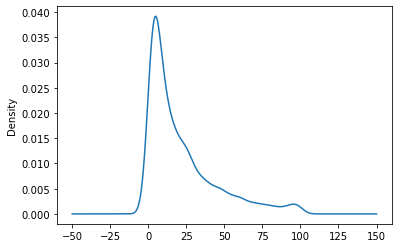

In [64]:
df_copy_me_mo['Size'].plot.density()

<AxesSubplot:ylabel='Density'>

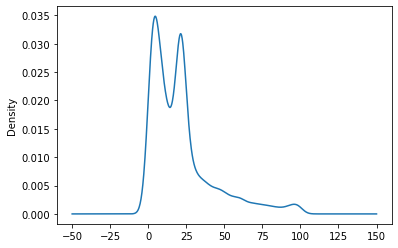

In [65]:
df_copy_me_mo['mean_Size'].plot.density()

<AxesSubplot:ylabel='Density'>

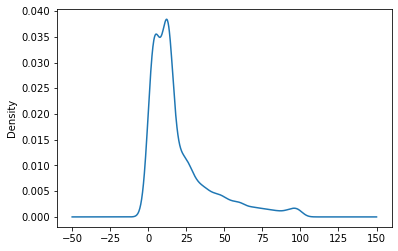

In [66]:
df_copy_me_mo['median_Size'].plot.density()

<Figure size 432x288 with 0 Axes>

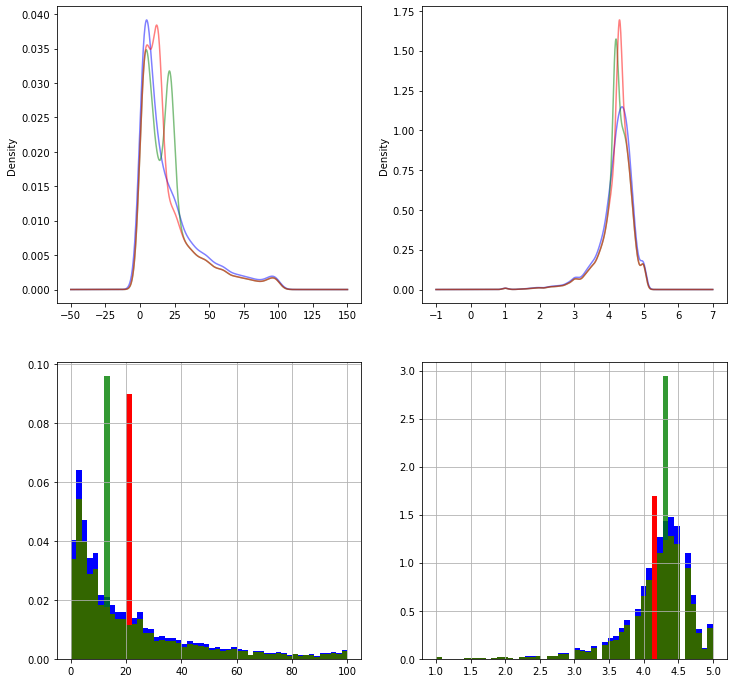

In [67]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df_copy_me_mo['Size'].plot.density(color='blue',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy_me_mo['mean_Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='mean_Size')
df_copy_me_mo['median_Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='median_Size')

df_copy_me_mo['Rating'].plot.density(color='blue',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy_me_mo['mean_Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='mean_Rating')
df_copy_me_mo['median_Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='median_Rating')

df_copy_me_mo['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)

df_copy_me_mo['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)


plt.show()

#### Insights
-As we can observe from above plots
- Mean and median imputation Technique is changing our distribution pattern.
- So we will reject mean and median imputation Technique also.

### 4. Random Sample Imputation

In [69]:
df_random = df.copy()

In [75]:
df_random['Size'].dropna().sample(20)

6417      8.200
1799     30.000
4369      9.700
7476     60.000
3274     58.000
5812      0.238
1978     99.000
9302      1.600
9886     22.000
7182      5.700
243      41.000
2255     33.000
430      14.000
5464      5.400
6916     17.000
8641      4.900
6672     24.000
1172     40.000
10441    16.000
6395      3.900
Name: Size, dtype: float64

In [79]:
[df_random['Size'].isnull().sum()

TypeError: 'RangeIndex' object is not callable

In [80]:
df_random[df_random['Size'].isnull()].index

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10646, 10678, 10680, 10706, 10711, 10712, 10724, 10764, 10825,
            10838],
           dtype='int64', length=1695)

In [77]:
df_random['Size'].dropna().sample(1695)

6865     3.400
1889    87.000
7365    27.000
2523     0.975
3857    11.000
         ...  
3358    12.000
5733    43.000
6997    24.000
2471     3.500
7983     5.000
Name: Size, Length: 1695, dtype: float64

In [ ]:
df_random[feature].dropna().sample(df_random[feature].isnull().sum())

In [84]:
def Random_Sample_imputation(feature):
    random_sample=df_random[feature].dropna().sample(df_random[feature].isnull().sum())               
    random_sample.index=df_random[df_random[feature].isnull()].index
    df_random.loc[df_random[feature].isnull(),feature]=random_sample

In [85]:
for col in df_random:
    Random_Sample_imputation(col)

In [86]:
print('Original Size Variance', df['Size'].var())
print('Size Variance After Random imputation', df_random['Size'].var())

Original Size Variance 510.5801557864865
Size Variance After Random imputation 512.061794015906


In [87]:
print('Original Size Variance', df['Rating'].var())
print('Size Variance After Rating imputation', df_random['Rating'].var())

Original Size Variance 0.26545047227541496
Size Variance After Rating imputation 0.26312297493096876


<Figure size 432x288 with 0 Axes>

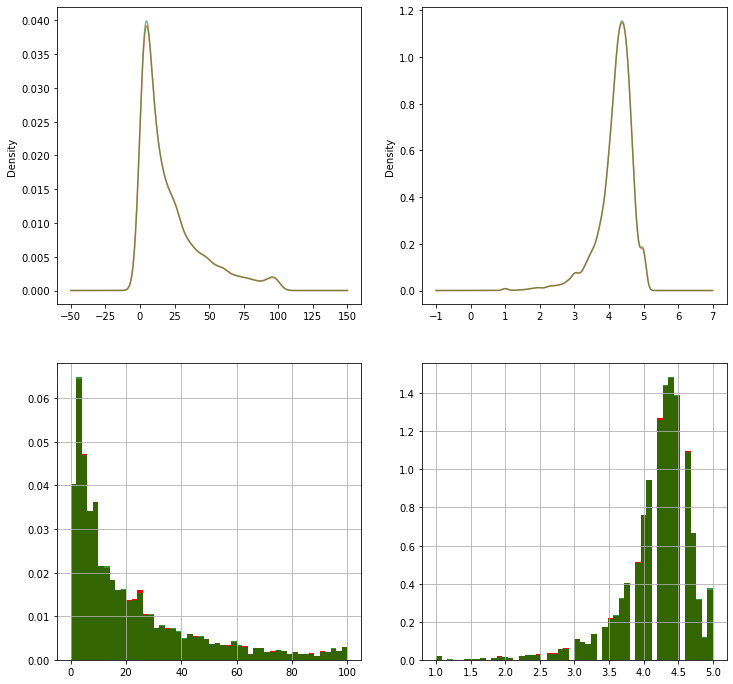

In [88]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_random['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_random['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_random['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_random['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

In [89]:
null_df = pd.DataFrame({'Null Values' : df_random.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_random.isna().sum().sort_values(ascending=False)) / (df_random.shape[0]) * (100)})
null_df

Null Values  Percentage Null Values
App                       0                     0.0
Category                  0                     0.0
Rating                    0                     0.0
Reviews                   0                     0.0
Size                      0                     0.0
Installs                  0                     0.0
Type                      0                     0.0
Price                     0                     0.0
Content Rating            0                     0.0
Genres                    0                     0.0
Last Updated              0                     0.0
Current Ver               0                     0.0
Android Ver               0                     0.0
Day                       0                     0.0
Month                     0                     0.0
Year                      0                     0.0

#### Insights
-As we can observe from above plots
- Random Sample imputation Technique has no impact on distribution pattern.
- So we will accept Random Sample imputation Technique .

In [90]:
num_features=[col for col in df_random.columns if df_random[col].dtype!='O']
num_df = df_random[num_features]
num_df.head()

Rating  Reviews  Size  Installs  Price  Day  Month  Year
0     4.1      159  19.0     10000    0.0    7      1  2018
1     3.9      967  14.0    500000    0.0   15      1  2018
2     4.7    87510   8.7   5000000    0.0    1      8  2018
3     4.5   215644  25.0  50000000    0.0    8      6  2018
4     4.3      967   2.8    100000    0.0   20      6  2018

In [25]:
df_random.to_csv('data/google_missing_imputed.csv', index = False)